# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_data = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?q='
print("Beginning Data Retrieval \n -----------------------------")
for city in cities:
    response = requests.get(url+city+"&APPID="+weather_api_key).json()
    try:
        lat = response["coord"]["lat"]
        lon = response["coord"]["lon"]
        temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloud = response["clouds"]["all"]
        wind = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]
        
        city_data.append({"City": city,
                        "Latitude": lat,
                        "Longitude": lon,
                        "Temperature": temp,
                        "Humidity": humidity,
                        "Cloud Conditions": cloud,
                        "Wind Speed": wind,
                        "Country": country,
                        "Date": date})

        print(f"Processing Record response {cities.index(city)}: {city}")
        
    except:
        print("There's nothing here!")
        pass
print("All Done!")

Beginning Data Retrieval 
 -----------------------------
Processing Record response 0: avarua
Processing Record response 1: buin
Processing Record response 2: magsaysay
Processing Record response 3: lompoc
Processing Record response 4: albany
Processing Record response 5: hilo
Processing Record response 6: banda aceh
Processing Record response 7: alihe
Processing Record response 8: dingle
Processing Record response 9: padang
Processing Record response 10: rikitea
Processing Record response 11: ushuaia
Processing Record response 12: hobart
Processing Record response 13: kosino
Processing Record response 14: macas
Processing Record response 15: mar del plata
Processing Record response 16: mersing
Processing Record response 17: carnarvon
Processing Record response 18: torbay
Processing Record response 19: dikson
There's nothing here!
Processing Record response 21: punta arenas
Processing Record response 22: vaini
Processing Record response 23: butaritari
Processing Record response 24: pon

Processing Record response 207: porkhov
Processing Record response 208: port elizabeth
Processing Record response 209: pauini
Processing Record response 210: sola
Processing Record response 211: gravdal
Processing Record response 212: saldanha
Processing Record response 213: dano
There's nothing here!
Processing Record response 215: springdale
Processing Record response 216: kota kinabalu
Processing Record response 217: kaitangata
Processing Record response 218: ancud
Processing Record response 219: gubkinskiy
Processing Record response 220: maragogi
Processing Record response 221: ilulissat
Processing Record response 222: talaya
Processing Record response 223: poum
Processing Record response 224: naze
Processing Record response 225: alta floresta
Processing Record response 226: yeniseysk
Processing Record response 227: brantford
Processing Record response 228: calvinia
Processing Record response 229: iquitos
Processing Record response 230: voyinka
Processing Record response 231: tazma

Processing Record response 414: fernie
Processing Record response 415: svetlyy
Processing Record response 416: prachuap khiri khan
Processing Record response 417: kamennogorsk
Processing Record response 418: quatre cocos
Processing Record response 419: shimanovsk
Processing Record response 420: port augusta
Processing Record response 421: porto belo
There's nothing here!
Processing Record response 423: mukhen
Processing Record response 424: sabla
Processing Record response 425: eufaula
Processing Record response 426: fortuna
Processing Record response 427: isangel
Processing Record response 428: liverpool
Processing Record response 429: iwanai
There's nothing here!
Processing Record response 431: dillon
Processing Record response 432: lavrentiya
Processing Record response 433: pevek
Processing Record response 434: esperance
Processing Record response 435: asau
Processing Record response 436: chakulia
Processing Record response 437: grindavik
Processing Record response 438: senno
Proces

Processing Record response 621: maturin
Processing Record response 622: taree
Processing Record response 623: nadym
Processing Record response 624: pangnirtung
There's nothing here!
Processing Record response 626: ca mau
Processing Record response 627: ittiri
Processing Record response 628: chupaca
Processing Record response 629: chase
Processing Record response 630: saint-augustin
Processing Record response 631: madimba
Processing Record response 632: asfi
Processing Record response 633: touros
All Done!


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_df = pd.DataFrame(city_data)
cities_df.to_csv('city_data.csv', index_label = "City")
cities_df.head()

,City,Cloud Conditions,Country,Date,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,avarua,100,CK,1581205126,74,-21.21,-159.78,303.15,6.2
1,buin,0,CL,1581205126,16,-33.73,-70.75,305.15,3.1
2,magsaysay,40,PH,1581205127,88,6.77,125.18,297.15,3.1
3,lompoc,1,US,1581205127,67,34.64,-120.46,292.04,7.2
4,albany,75,US,1581205127,62,42.60,-73.97,267.04,2.6


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

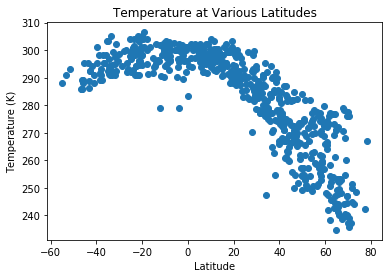

In [22]:
plt.scatter(cities_df['Latitude'], cities_df['Temperature'])
plt.title("Temperature at Various Latitudes")
plt.xlabel("Latitude")
plt.ylabel("Temperature (K)")

plt.show

plt.savefig('temperature_by_lat.png')
#this code creates a scatter plot comparing the relationship between temperature (in Kelvin) and latitude.
#As we can see, as temperature approaches the equator (0 on the latitude line) temperature increases
#There is a slight skew toward warmer temps south of the equator.

#### Latitude vs. Humidity Plot

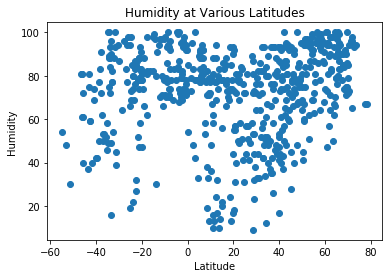

In [14]:
plt.scatter(cities_df['Latitude'], cities_df['Humidity'])
plt.title("Humidity at Various Latitudes")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show
plt.savefig('humidity_by_lat.png')

#### Latitude vs. Cloudiness Plot

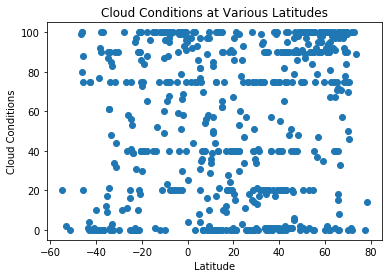

In [16]:
plt.scatter(cities_df['Latitude'], cities_df['Cloud Conditions'])
plt.title("Cloud Conditions at Various Latitudes")
plt.xlabel("Latitude")
plt.ylabel("Cloud Conditions")
plt.show
plt.savefig('cloudiness_by_latitude.png')

#### Latitude vs. Wind Speed Plot

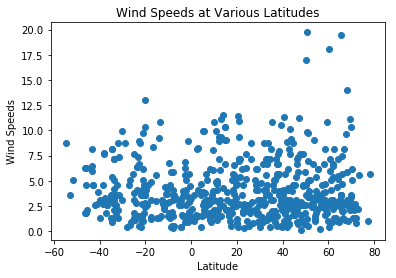

In [18]:
plt.scatter(cities_df['Latitude'], cities_df['Wind Speed'])
plt.title("Wind Speeds at Various Latitudes")
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds")
plt.show
plt.savefig('wind_by_lat.png')

## Linear Regression

In [60]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression_func(x_df, y_df):
    x_vals = np.array([x for x in x_df])
    y_vals = np.array([y for y in y_df])
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
    regress_values = [x * slope + intercept for x in x_vals]
    equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(equation, (x_vals.min(), x_vals.max()), regress_values,"r-")
    plt.annotate(equation,fontsize=10,color="black")

In [61]:
# Create Northern and Southern Hemisphere DataFrames
northern_cities = cities_df.loc[cities_df["Latitude"] > 0]
southern_cities = cities_df.loc[cities_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

ValueError: x and y must have same first dimension, but have shapes (1,) and (2,)

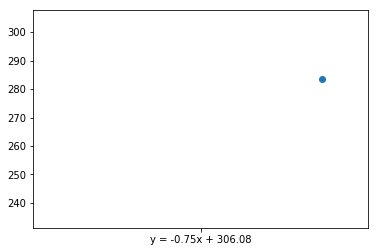

In [62]:
plt.scatter(northern_cities["Latitude"], northern_cities["Temperature"],)
regression_func(northern_cities['Latitude'], northern_cities["Temperature"])
plt.xlabels('Latitude')
plt.ylabels("Temperature (K)")
plt.title("Temperature by Latitude (North): Regression")
plt.show

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression